In [1]:
# Linear regression by using Deep Neural network: 
# Implement Boston housing price prediction problem 
# by Linearregression using Deep Neural network. 
# Use Boston House price prediction dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#data = pd.read_csv("boston.csv")
data = pd.read_csv("1_boston_housing_keggle.csv")

In [7]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
data.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [9]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'MEDV'],
      dtype='object')

In [14]:
data.shape

(506, 14)

In [16]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [18]:
import seaborn as sns

<Axes: xlabel='MEDV', ylabel='Count'>

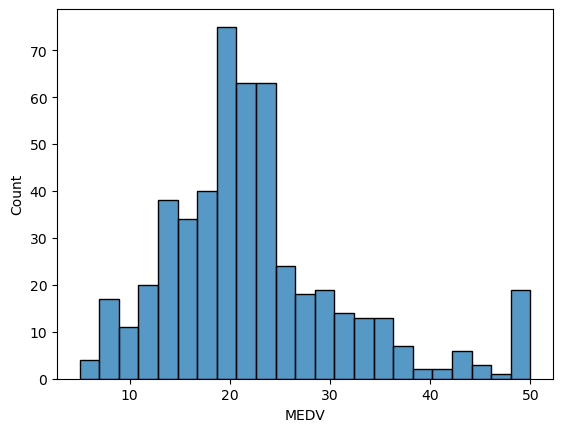

In [19]:
sns.histplot(data['MEDV'])

<Axes: >

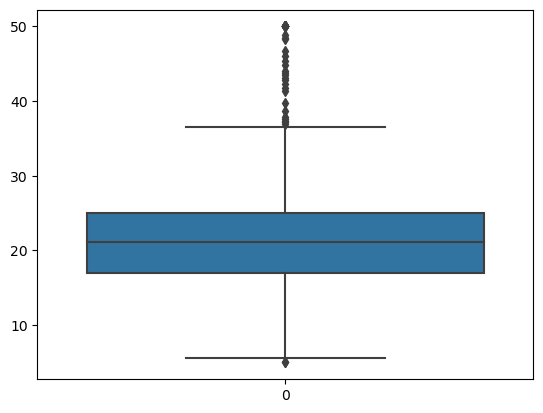

In [20]:
sns.boxplot(data['MEDV'])

In [23]:
from sklearn.preprocessing import StandardScaler 

In [24]:
X = data.drop('MEDV',axis=1)

Y = data['MEDV']

# Scale the input features

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split

# split the data into training and testing sets

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,
                                                 random_state=42)

In [27]:
print('Training set shape:', X_train.shape,Y_train.shape)

Training set shape: (404, 13) (404,)


In [28]:
print('Testing Set Shape',X_test.shape,Y_test.shape)

Testing Set Shape (102, 13) (102,)


In [29]:
from keras.models import Sequential

from keras.layers import Dense, Dropout

In [38]:
# Define the model architecture

model = Sequential()

model.add(Dense(128, activation='relu', input_dim = 13))

model.add(Dense(64, activation='relu'))

model.add(Dense(32,activation='relu'))

model.add(Dense(16,activation='relu'))

# Output Layer
# For regression tasks, use a single neuron without activation function

model.add(Dense(1))

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
#  Display the model summary

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

None


In [40]:
# Compile the model

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [41]:
X_val = X_train

Y_val = Y_train

In [42]:
history = model.fit(X_train,
                   Y_train,
                   epochs=15,
                   batch_size=512,
                   validation_data=(X_val,Y_val))

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 615.3365 - mae: 22.9923 - val_loss: 611.0254 - val_mae: 22.9036
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 611.0254 - mae: 22.9036 - val_loss: 607.1930 - val_mae: 22.8243
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 607.1930 - mae: 22.8243 - val_loss: 603.7273 - val_mae: 22.7528
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 603.7274 - mae: 22.7528 - val_loss: 600.5186 - val_mae: 22.6856
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 600.5186 - mae: 22.6856 - val_loss: 597.4478 - val_mae: 22.6197
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 597.4478 - mae: 22.6197 - val_loss: 594.3651 - val_mae: 22.5531
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 594.3651 - mae: 22.5531 - val_loss: 591.1924 - val_mae: 22.4843
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 591.1924 - mae: 22.4843 - val_loss: 587.7640 - val_mae: 22.4109
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━

In [43]:
results = model.evaluate(X_test,Y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 490.7367 - mae: 20.3236 


In [44]:
y_pred = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [46]:
# conf_matrix = confusion_matrix(Y_test,y_pred)

# print(conf_matrix)


# The error "continuous is not supported" typically occurs 
# when you're trying to compute a confusion matrix for a regression
# problem instead of a classification problem. Since your task is a
# regression problem (predicting house prices), 
# calculating a confusion matrix 
# doesn't make sense because confusion matrices are for
# classification problems, 
# not regression.

In [47]:
# Compute mean absolute error

mae = mean_absolute_error(Y_test,y_pred)
print("Mean absolute error (MAE):", mae)

Mean absolute error (MAE): 20.432723415716023


In [48]:
# Compute mean squared error

mse = mean_squared_error(Y_test,y_pred)
print("Mean Squared error (MSE):",mse)

Mean Squared error (MSE): 487.3969857568607


In [49]:
# Compute R-squared (R2) score

r2 = r2_score(Y_test,y_pred)
print("R-squared (R2) Score:",r2)

R-squared (R2) Score: -5.646281764726486


In [ ]:
# new_model = Sequential()

# new_model.add(Dense(256, activation='relu', input_dim=13))  
# Increase the number of neurons in the first layer
# new_model.add(Dropout(0.5))  # Increase dropout rate to 50%

# new_model.add(Dense(128, activation='relu'))  
# Add additional hidden layers
# new_model.add(Dropout(0.3))  # Add dropout after each hidden layer
# new_model.add(Dense(64, activation='relu'))
# new_model.add(Dropout(0.3))
# new_model.add(Dense(32, activation='relu'))
# new_model.add(Dropout(0.3))
# new_model.add(Dense(16, activation='relu'))

# new_model.add(Dense(1))


# Mean Absolute Error (MAE): 13.776206224572427
# Mean Squared Error (MSE): 249.77224408948888
# R-squared (R2) Score: -2.4059642544751116

In [ ]:
# Model 2 performs better than Model 1 in terms of MAE and MSE,
# as it has lower values for both metrics.
# However, both models have negative R-squared (R2) scores,
# which suggests poor fit to the data. A negative R-squared score 
# indicates that the model performs worse than a horizontal line 
# (the mean of the target variable).
# Considering the negative R-squared scores, 
# it appears that neither model provides a good fit to the data.
# In this case, you might need to revisit the model architecture, features,
# or data preprocessing steps to improve model performance. Additionally, 
# cross-validation and further experimentation could help 
# in selecting a better model.

